<h1 align="center">Volume 4: Inverse Problems.</h1>

    Bryant McArthur
    Section #
    January 26, 2023

In [18]:
from scipy.optimize import minimize
import numpy as np
from scipy.integrate import quad
from matplotlib import pyplot as plt

# Problem 1

Solve (16.2) for a(x).
Produce the plot shown in Figure 16.2.

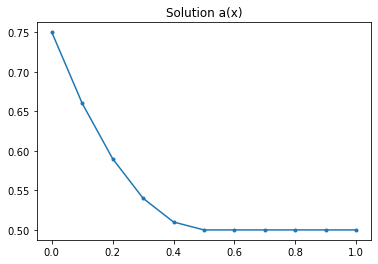

In [25]:
# Initialize everything
c0 = 3/8
c1 = 5/4
u = lambda x: x**2 + x/2 + 5/16
du = lambda x: 2*x + 1/2

def f(x):
    if x <= 1/2:
        return -6*x**2 + 3*x -1
    else:
        return -1

N = 10
X = np.linspace(0,1,N+1)
h = 1/N

def phi(x,j):
    if X[j-1] <= x <= X[j]:
        return (x-X[j-1])/h
    elif X[j] <= x <= X[j+1]:
        return (X[j+1] - x)/h
    else:
        return 0
    
# Iterate through xjs and solve for alphajs 
a_to_hs = []
alphajs = []
for xj in X:
    j = 0
    F = quad(f,0,xj)[0]
    obj = lambda alphaj: (((c0 - F)/alphaj) - du(xj))**2
    alphaj = minimize(obj, .3).x
    alphajs.append(alphaj)
    
    j += 1
    
# Plot it
plt.plot(X, alphajs, '.-')
plt.title("Solution a(x)")
plt.show()

# Problem 2

Find the density function a(x). Using several values of ε > 0.66049142, plot the corresponding
density a(x) for x in np.linspace(0,1,11) to demonstrate that the problem is ill-posed.

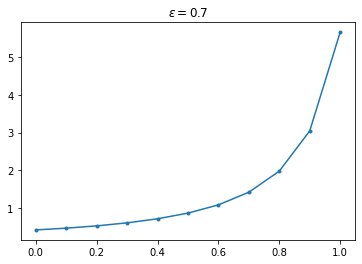

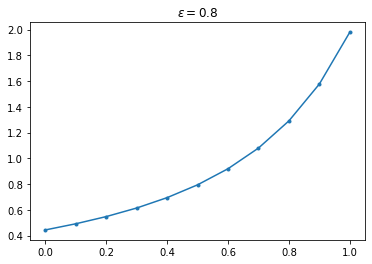

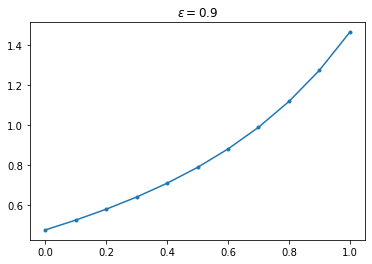

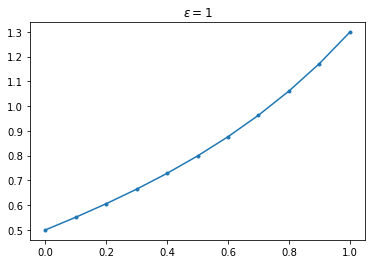

In [30]:
# Initialize everything
f = lambda x: -1
c0 = 1
c1 = 2
N = 10
h = 1/N
X = np.linspace(0,1,N+1)

u = lambda x: x + 1 + eps*np.sin(eps**(-2)*x)
du = lambda x: 1 + np.cos(eps**(-2)*x)/eps

# Iterate through different values of epsilon
for eps in [.7,.8,.9,1]:
    # Iterate through xjs
    alphajs = []
    for xj in X:
        j = 0
        F = quad(f,0,xj)[0]
        obj = lambda alphaj: (((c0 - F)/alphaj) - du(xj))**2
        alphaj = minimize(obj, .3).x

        alphajs.append(alphaj)
        j += 1
    
    # plot it
    plt.plot(X,alphajs, '.-')
    plt.title(rf"$\epsilon={eps}$")
    plt.show()